In [1]:
cd C:\Users\xupu\Desktop\个人征信

C:\Users\xupu\Desktop\个人征信


In [2]:
import pandas as pd
import numpy as np

In [3]:
user_info_train = pd.read_csv('train//user_info_train.txt',header=None,names=['user_id','sex','occupation','education','marriage','household'])
user_info_test = pd.read_csv('test//user_info_test.txt',header=None,names=['user_id','sex','occupation','education','marriage','household'])

In [4]:
bank_detail_train = pd.read_csv('train//bank_detail_train.txt',header=None,names=['user_id','tm_encode','trade_type','trade_amount','salary_tag'])
bank_detail_test = pd.read_csv('test//bank_detail_test.txt',header=None,names=['user_id','tm_encode','trade_type','trade_amount','salary_tag'])

In [5]:
bank_detail_train.head()

,user_id,tm_encode,trade_type,trade_amount,salary_tag
0,6965,5894316387,0,13.756664,0
1,6965,5894321388,1,13.756664,0
2,6965,5897553564,0,14.449810,0
3,6965,5897563463,1,10.527763,0
4,6965,5897564598,1,13.651303,0


In [253]:
#计算个人净总收入  平均收入？
grouped0_train = bank_detail_train.groupby(['user_id','trade_type'])
grouped0_test = bank_detail_test.groupby(['user_id','trade_type'])

In [257]:
income_train = grouped0_train['trade_amount'].sum().unstack()
income_test = grouped0_test['trade_amount'].sum().unstack()

In [258]:
income_train.rename(columns={0:'shouru',1:'zhichu'},inplace = True)
income_test.rename(columns={0:'shouru',1:'zhichu'},inplace = True)

In [259]:
income_train['netincome'] = income_train['shouru']-income_train['zhichu']
income_test['netincome'] = income_test['shouru']-income_test['zhichu']

In [260]:
incomes_train = income_train['netincome']
incomes_test = income_test['netincome']

In [261]:
# 计算个人平均工资收入
tag1_train = bank_detail_train.loc[bank_detail_train['salary_tag']==1]
tag1_test = bank_detail_test.loc[bank_detail_test['salary_tag']==1]

In [262]:
salary_train = tag1_train.groupby('user_id')['trade_amount'].mean()
salary_test = tag1_test.groupby('user_id')['trade_amount'].mean()

In [263]:
bank_train = pd.concat([incomes_train,salary_train],axis=1)
bank_test = pd.concat([incomes_test,salary_test],axis=1)

In [264]:
bank_train.shape

(9294, 2)

In [265]:
new_bank_train = bank_train.reset_index()
new_bank_test = bank_test.reset_index()#合并到总表

In [16]:
#new_bank_train.loc[new_bank_train['trade_amount'].isnull(),'tag']=0， 与平均工资收入特征重复
#new_bank_test.loc[new_bank_test['trade_amount'].isnull(),'tag']=0

In [17]:
#new_bank_train.loc[new_bank_train['trade_amount'].notnull(),'tag']=1
#new_bank_test.loc[new_bank_test['trade_amount'].notnull(),'tag']=1

In [266]:
bill_detail_train = pd.read_csv('train//bill_detail_train.txt',header=None,names=['user_id','tm_encode','bank_id','last_bill','last_return','credit_amount','this_bill_left','minreturn_bill','use_times','this_bill_amount','adjust_amount','recircle_rate','left_amount','load_amount','return_item'])

In [267]:
bill_detail_test = pd.read_csv('test//bill_detail_test.txt',header=None,names=['user_id','tm_encode','bank_id','last_bill','last_return','credit_amount','this_bill_left','minreturn_bill','use_times','this_bill_amount','adjust_amount','recircle_rate','left_amount','load_amount','return_item'])

In [268]:
bill_detail_train.head()

,user_id,tm_encode,bank_id,last_bill,last_return,credit_amount,this_bill_left,minreturn_bill,use_times,this_bill_amount,adjust_amount,recircle_rate,left_amount,load_amount,return_item
0,3150,5906744363,6,18.626118,18.661937,20.664418,18.905766,17.847133,1,0.0,0.0,0.0,0.0,19.971271,0
1,3150,5906744401,6,18.905766,18.909954,20.664418,19.113305,17.911506,1,0.0,0.0,0.0,0.0,19.971271,0
2,3150,5906744427,6,19.113305,19.150290,20.664418,19.300194,17.977610,1,0.0,0.0,0.0,0.0,19.971271,0
3,3150,5906744515,6,19.300194,19.300280,21.000890,20.303240,18.477177,1,0.0,0.0,0.0,0.0,20.307743,0
4,3150,5906744562,6,20.303240,20.307744,21.000890,20.357134,18.510985,1,0.0,0.0,0.0,0.0,20.307743,0


In [269]:
# 平均信用卡账单金额
mean_bill_train = bill_detail_train.loc[:,['user_id','this_bill_amount']]
mean_bill_test = bill_detail_test.loc[:,['user_id','this_bill_amount']]

In [270]:
mean_bill_train = mean_bill_train.loc[mean_bill_train['this_bill_amount']!=0]
mean_bill_test = mean_bill_test.loc[mean_bill_test['this_bill_amount']!=0]

In [271]:
mean_bill_train = mean_bill_train.groupby('user_id')['this_bill_amount'].mean()
mean_bill_test = mean_bill_test.groupby('user_id')['this_bill_amount'].mean()

In [272]:
# 合并到表
mean_bill_train = pd.DataFrame(mean_bill_train).reset_index()
mean_bill_test = pd.DataFrame(mean_bill_test).reset_index()

In [273]:
bill_detail_train['last_return_diff']=bill_detail_train['last_return']-bill_detail_train['last_bill']
bill_detail_test['last_return_diff']=bill_detail_test['last_return']-bill_detail_test['last_bill']

In [274]:
bill_detail_train = bill_detail_train.drop(['tm_encode','last_bill','last_return','minreturn_bill','use_times','adjust_amount'],axis=1)
bill_detail_test = bill_detail_test.drop(['tm_encode','last_bill','last_return','minreturn_bill','use_times','adjust_amount'],axis=1)

In [275]:
#持有信用卡数量
banks_train = bill_detail_train[['user_id','bank_id']]
banks_test = bill_detail_test[['user_id','bank_id']]

In [276]:
banks1_train = banks_train.drop_duplicates()
banks1_test = banks_test.drop_duplicates()

In [277]:
banks2_train = banks1_train.groupby('user_id')
banks2_test = banks1_test.groupby('user_id')

In [278]:
banks3_train = banks2_train.count()
banks3_test = banks2_test.count()

In [279]:
banks4_train = banks3_train.reset_index()
banks4_test = banks3_test.reset_index()

In [280]:
banks5_train = banks4_train.rename(columns={'bank_id':'banks'})
banks5_test = banks4_test.rename(columns={'bank_id':'banks'})
#合并到表

In [281]:
grouped1_train = bill_detail_train.groupby(['user_id','bank_id'])
grouped1_test = bill_detail_test.groupby(['user_id','bank_id'])

In [282]:
#平均信用卡额度
credit_amount_train = (grouped1_train['credit_amount'].sum())/(grouped1_train['credit_amount'].size())
credit_amount_test = (grouped1_test['credit_amount'].sum())/(grouped1_test['credit_amount'].size())

In [283]:
credit_amounts_train = pd.DataFrame(credit_amount_train).reset_index()
credit_amounts_test = pd.DataFrame(credit_amount_test).reset_index()

In [284]:
credit_amounts_train.rename(columns={0:'credits'},inplace=True)
credit_amounts_test.rename(columns={0:'credits'},inplace=True)

In [285]:
user_credit_amount_train = pd.DataFrame(credit_amounts_train.groupby('user_id')['credits'].sum())
user_credit_amount_test = pd.DataFrame(credit_amounts_test.groupby('user_id')['credits'].sum())

In [286]:
user_credit_amount_train = user_credit_amount_train.reset_index()
user_credit_amount_test = user_credit_amount_test.reset_index()
#合并到表

In [287]:
grouped2_train = bill_detail_train.groupby('user_id')
grouped2_test = bill_detail_test.groupby('user_id')

In [288]:
#用户信用卡发生的总利息
user_rate_train = grouped2_train['recircle_rate','last_return_diff'].sum().reset_index()
user_rate_test = grouped2_test['recircle_rate','last_return_diff'].sum().reset_index()

In [82]:
#user_loan_train = pd.DataFrame(grouped2_train['load_amount'].mean()).reset_index()  与本期账单金额特征重复
#user_loan_test = pd.DataFrame(grouped2_test['load_amount'].mean()).reset_index()

In [289]:
d_train = pd.merge(banks5_train,user_credit_amount_train,on='user_id')
d_test = pd.merge(banks5_test,user_credit_amount_test,on='user_id')

In [290]:
e_train = pd.merge(d_train,user_rate_train,on='user_id')
e_test = pd.merge(d_test,user_rate_test,on='user_id')

In [291]:
f_train = pd.merge(e_train,mean_bill_train,on='user_id') 
f_test = pd.merge(e_test,mean_bill_train,on='user_id') 

#合并到总表

In [95]:
#loan_time_train = pd.read_csv('train//loan_time_train.txt',header = None,names=['user_id','loan_time'])
#loan_time_test = pd.read_csv('test//loan_time_test.txt',header = None,names=['user_id','loan_time'])

In [292]:
overdue_train = pd.read_csv('train//overdue_train.txt',header=None,names=['user_id','target'])

In [293]:
browse_history_train = pd.read_csv('train//browse_history_train.txt',header=None,names=['user_id','tm_encode_2','browse_data','browse_tag'])

In [294]:
browse_history_test = pd.read_csv('test//browse_history_test.txt',header=None,names=['user_id','tm_encode_2','browse_data','browse_tag'])

In [295]:
#用户总浏览频次
browse_times_train = browse_history_train[['user_id','tm_encode_2']]

In [296]:
browse_times_test = browse_history_test[['user_id','tm_encode_2']]

In [297]:
browse_train = browse_times_train.drop_duplicates()
browse_test = browse_times_test.drop_duplicates()

In [298]:
browse1_train = browse_train.groupby('user_id')
browse1_test = browse_test.groupby('user_id')

In [299]:
browse2_train = browse1_train['tm_encode_2'].count()
browse2_test = browse1_test['tm_encode_2'].count()

In [300]:
browse3_train = pd.DataFrame(browse2_train).reset_index()
browse3_test = pd.DataFrame(browse2_test).reset_index()

In [301]:
browse3_train.shape

(47330, 2)

In [305]:
df_train = pd.merge(user_info_train,overdue_train,on='user_id')

In [120]:
#df0_train = pd.merge(df_train,loan_time_train,on='user_id')
#df0_test = pd.merge(user_info_test,loan_time_test,on='user_id')

In [306]:
df1_train = pd.merge(df_train,f_train,on='user_id',how='left')
df1_test = pd.merge(user_info_test,f_test,on='user_id',how='left')

In [307]:
df2_train = pd.merge(df1_train,new_bank_train,on='user_id',how='left')
df2_test = pd.merge(df1_test,new_bank_test,on='user_id',how='left')

In [310]:
df2_train.shape

(55596, 14)

In [309]:
df3_train = pd.merge(df2_train,browse3_train,on='user_id',how='left')
df3_test = pd.merge(df2_test,browse3_test,on='user_id',how='left')

In [311]:
df3_train.loc[:20]

,user_id,sex,occupation,education,marriage,household,target,banks,credits,recircle_rate,last_return_diff,this_bill_amount,netincome,trade_amount,tm_encode_2
0,3150,1,2,4,1,4,0,5.0,82.563651,0.000000,29.604743,19.680223,NaN,NaN,NaN
1,6965,1,2,4,3,2,0,2.0,39.942542,62.082722,10.922189,18.825107,-2261.681747,NaN,34.0
2,1265,1,3,4,3,1,0,2.0,39.959643,279.476096,-190.300944,19.007284,-1954.250868,NaN,3.0
3,6360,1,2,4,3,2,0,8.0,129.424333,1161.246092,-235.075394,18.631734,NaN,NaN,3.0
4,2583,2,2,2,1,1,0,3.0,57.061862,155.478508,1.760083,18.762691,-4327.835360,NaN,5.0
5,34764,1,2,3,3,1,1,4.0,62.175574,0.000000,-15.329336,20.443876,NaN,NaN,24.0
6,9554,1,2,4,2,2,0,2.0,0.000000,111.933703,0.529815,22.916942,NaN,NaN,NaN
7,6720,1,2,3,3,2,0,1.0,20.559057,0.000000,-0.979485,19.460566,NaN,NaN,2.0
8,29165,1,2,4,1,4,0,2.0,39.942541,0.000000,59.475954,19.454963,-2822.253358,14.473609,6.0
9,6966,1,2,3,1,4,0,4.0,74.615248,2428.861889,-279.329197,17.755971,NaN,NaN,NaN


In [76]:
#df3_train['netincome'].fillna(df3_train['netincome'].mean(),inplace=True)
#df3_test['netincome'].fillna(df3_test['netincome'].mean(),inplace=True)

In [77]:
#df3_train['trade_amount'].fillna(0,inplace=True)
#df3_test['trade_amount'].fillna(0,inplace=True)

In [78]:
#df3_train['tag'].fillna(0,inplace=True)
#df3_test['tag'].fillna(0,inplace=True)

In [79]:
#df3_train['tm_encode_2'].fillna(0,inplace=True)
#df3_test['tm_encode_2'].fillna(0,inplace=True)

In [312]:
df3_train.fillna(0,inplace=True)
df3_test.fillna(0,inplace=True)

In [313]:
df3_train.head()

,user_id,sex,occupation,education,marriage,household,target,banks,credits,recircle_rate,last_return_diff,this_bill_amount,netincome,trade_amount,tm_encode_2
0,3150,1,2,4,1,4,0,5.0,82.563651,0.000000,29.604743,19.680223,0.000000,0.0,0.0
1,6965,1,2,4,3,2,0,2.0,39.942542,62.082722,10.922189,18.825107,-2261.681747,0.0,34.0
2,1265,1,3,4,3,1,0,2.0,39.959643,279.476096,-190.300944,19.007284,-1954.250868,0.0,3.0
3,6360,1,2,4,3,2,0,8.0,129.424333,1161.246092,-235.075394,18.631734,0.000000,0.0,3.0
4,2583,2,2,2,1,1,0,3.0,57.061862,155.478508,1.760083,18.762691,-4327.835360,0.0,5.0


In [315]:
X_test = df3_test.drop(['user_id'],axis=1)

In [316]:
X = df3_train.drop(['user_id','target'],axis=1)
Y = df3_train['target']

In [317]:
X.dtypes

sex                   int64
occupation            int64
education             int64
marriage              int64
household             int64
banks               float64
credits             float64
recircle_rate       float64
last_return_diff    float64
this_bill_amount    float64
netincome           float64
trade_amount        float64
tm_encode_2         float64
dtype: object

In [318]:
from sklearn.cross_validation import train_test_split

In [319]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.7)

In [156]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
rf = RandomForestClassifier(n_estimators=100)

In [158]:
rf.fit(trainx,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [159]:
rf.score(testx,ytest)

0.87139516757599378

In [160]:
rf.predict_proba(testx)

array([[ 0.85,  0.15],
       [ 0.93,  0.07],
       [ 0.84,  0.16],
       ..., 
       [ 0.97,  0.03],
       [ 0.92,  0.08],
       [ 0.71,  0.29]])

In [320]:
from sklearn.ensemble import GradientBoostingClassifier

In [334]:
gbc = GradientBoostingClassifier()

In [335]:
gbc.fit(xtrain,ytrain)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [336]:
gbc.score(xtest,ytest)

0.87025601055219137

In [337]:
gbc.predict_proba(xtest)

array([[ 0.86753377,  0.13246623],
       [ 0.89639048,  0.10360952],
       [ 0.92985916,  0.07014084],
       ..., 
       [ 0.87378964,  0.12621036],
       [ 0.87002811,  0.12997189],
       [ 0.86408613,  0.13591387]])

In [338]:
from sklearn.metrics import precision_recall_curve

In [339]:
ytrue = ytest

In [340]:
pred =gbc.predict_proba(xtest)[:,1]

In [341]:
pre,recall,thre = precision_recall_curve(ytrue,pred)

In [342]:
import matplotlib.pyplot as plt
%matplotlib inline

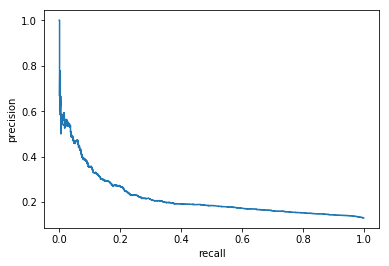

In [343]:
plt.plot(recall,pre)
plt.xlabel('recall')
plt.ylabel('precision')

In [344]:
from sklearn.metrics import roc_auc_score

In [345]:
roc_auc_score(ytrue,pred)

0.62360380384992631

In [346]:
gbc.feature_importances_

array([ 0.12144677,  0.02677931,  0.03662658,  0.0256434 ,  0.01541898,
        0.03868013,  0.09292108,  0.09843573,  0.11010643,  0.15900747,
        0.12370005,  0.05090215,  0.10033192])

In [347]:
predict = gbc.predict_proba(X_test)[:,1]

In [348]:
predict = pd.Series(predict)

In [349]:
result = pd.concat([df3_test['user_id'],predict],axis=1)

In [350]:
result = result.rename(columns={'user_id':'userid',0:'probability'})

In [351]:
result.to_csv('C:\\Users\\xupu\\Desktop\\xupu11.csv',index=False)